Author: William Mwine <br>
Github: [willsketch](https://github.com/willsketch) <br>

# Analysis of ATAC-seq data from this [paper](https://doi.org/10.1038/s44318-024-00295-y)

## STUDY: Redistribution of PU.1 partner transcription factor RUNX1 binding secures cell survival during leukemogenesis
paper: https://doi.org/10.1038/s44318-024-00295-y \
GEO : https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE251674 \
> **Data**:\
> knockdown (URE) -> GSM7982943: URE GMP, ATAC-seq, rep2; Mus musculus; ATAC-seq (SRR27289034) \
> wild type () -> GSM7982949: WT GMP, ATAC-seq, rep2; Mus musculus; ATAC-seq (SRR27289028) \

PU.1, a key transcription factor for myeloid lineage development, is critical for gene regulation and cell survival during leukemogenesis. Its downregulation in acute myeloid leukemia (AML) shifts survival mechanisms from cytokine-driven pathways to a stem cell gene program dominated by autophagy. This process involves RUNX1 redistributing its binding to alternative genomic sites to compensate for PU.1 loss.\

I analysed ATAC-seq data from the study between wild-type(WT) GMP cells and URE knockdown(PU.1 downregulated) GMP cells to investigate how PU.1 downregulation affects chromatin accessibility


# Data acquistion
**Overview of the data** <br>
URE_knockdown data: SRR27289034 <br>
    - 9,759,455 spots <br>
    - paired <br>
Wild type data: SRR27289028 <br>
    - 46,683,645 spots <br>
    - paired <br>

In [1]:
fasterq-dump -h


Usage: fasterq-dump [ options ] [ accessions(s)... ]

Parameters:

  accessions(s)                    list of accessions to process


Options:

  -o|--outfile <path>              full path of outputfile (overrides usage
                                     of current directory and given accession)
  -O|--outdir <path>               path for outputfile (overrides usage of
                                     current directory, but uses given
                                     accession)
  -b|--bufsize <size>              size of file-buffer (dflt=1MB, takes
                                     number or number and unit where unit is
                                     one of (K|M|G) case-insensitive)
  -c|--curcache <size>             size of cursor-cache (dflt=10MB, takes
                                     number or number and unit where unit is
                                     one of (K|M|G) case-insensitive)
  -m|--mem <size>                  memory limit for sorting (dflt=

In [2]:
# knockdown 
prefetch SRR27289034
fasterq-dump --threads 8 --progress --split-files SRR27289034


2024-12-02T17:17:26 prefetch.3.0.0: Current preference is set to retrieve SRA Normalized Format files with full base quality scores.
2024-12-02T17:17:26 prefetch.3.0.0: 1) Downloading 'SRR27289034'...
2024-12-02T17:17:26 prefetch.3.0.0: SRA Normalized Format file is being retrieved, if this is different from your preference, it may be due to current file availability.
2024-12-02T17:17:26 prefetch.3.0.0:  Downloading via HTTPS...
2024-12-02T17:18:47 prefetch.3.0.0:  HTTPS download succeed
2024-12-02T17:18:52 prefetch.3.0.0:  'SRR27289034' is valid
2024-12-02T17:18:52 prefetch.3.0.0: 1) 'SRR27289034' was downloaded successfully
2024-12-02T17:18:52 prefetch.3.0.0: 'SRR27289034' has 0 unresolved dependencies
join   :|  0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.

In [1]:
# wild type 
prefetch SRR27289028
fasterq-dump --threads 8 --progress --split-files SRR27289028


2024-12-02T21:02:04 prefetch.3.0.0: Current preference is set to retrieve SRA Normalized Format files with full base quality scores.
2024-12-02T21:02:04 prefetch.3.0.0: 1) Downloading 'SRR27289028'...
2024-12-02T21:02:04 prefetch.3.0.0: SRA Normalized Format file is being retrieved, if this is different from your preference, it may be due to current file availability.
2024-12-02T21:02:04 prefetch.3.0.0:  Downloading via HTTPS...
2024-12-02T21:02:04 prefetch.3.0.0:    Continue download of 'SRR27289028' from 1510751775
2024-12-02T21:02:28 prefetch.3.0.0:  HTTPS download succeed
2024-12-02T21:02:37 prefetch.3.0.0:  'SRR27289028' is valid
2024-12-02T21:02:37 prefetch.3.0.0: 1) 'SRR27289028' was downloaded successfully
2024-12-02T21:02:37 prefetch.3.0.0: 'SRR27289028' has 0 unresolved dependencies
join   :|  0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.4 0.4 0.4 0.4 0.4 0.4 

# Quality Control 
In this section, I perform quality control (QC) of the FASTQ files using **FastQC**. All the files pass and fail the same metrics, so I will only discuss the QC results for one file (**SRR27289034_1.fastq**) as a representative example.

### QC Summary Highlights  

- **Per Base Sequence Quality**:  
  The reads exhibit good quality across their lengths, indicating reliable sequencing data.  

- **Adapter Content**:  
  The adapter content is **0%**, so there is no need for additional processing to remove adapter sequences. This further confirms the data's quality.

- **Per Base Sequence Content**:  
  The file fails this metric due to instability in sequence content at the beginning of the reads. However this is not problematic and will not sigmificantly affect downstream analysis.


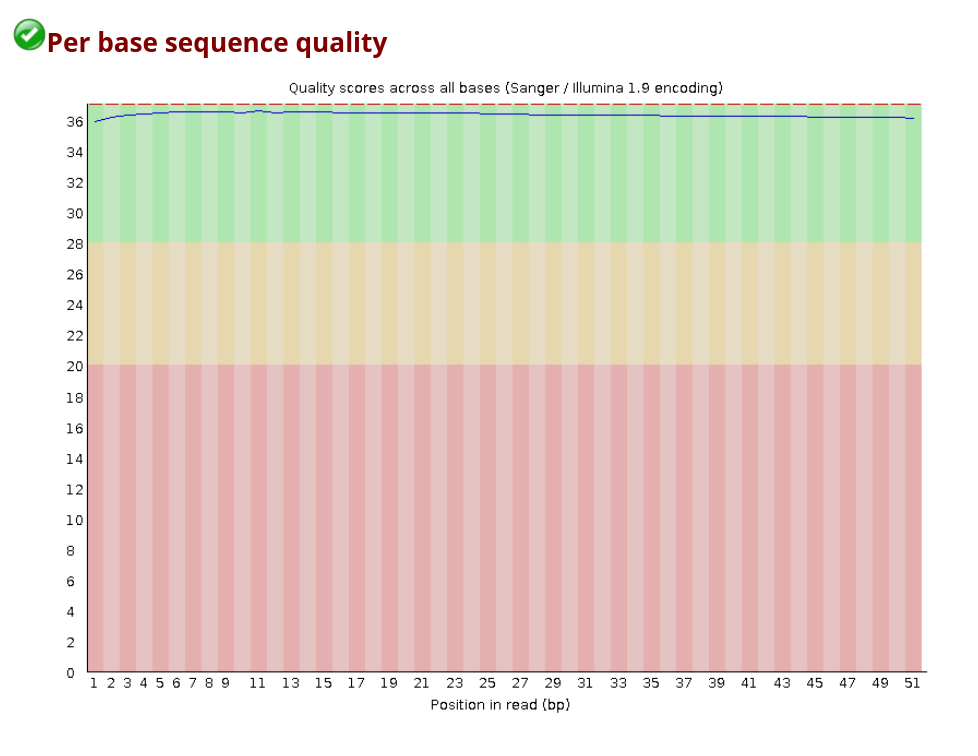

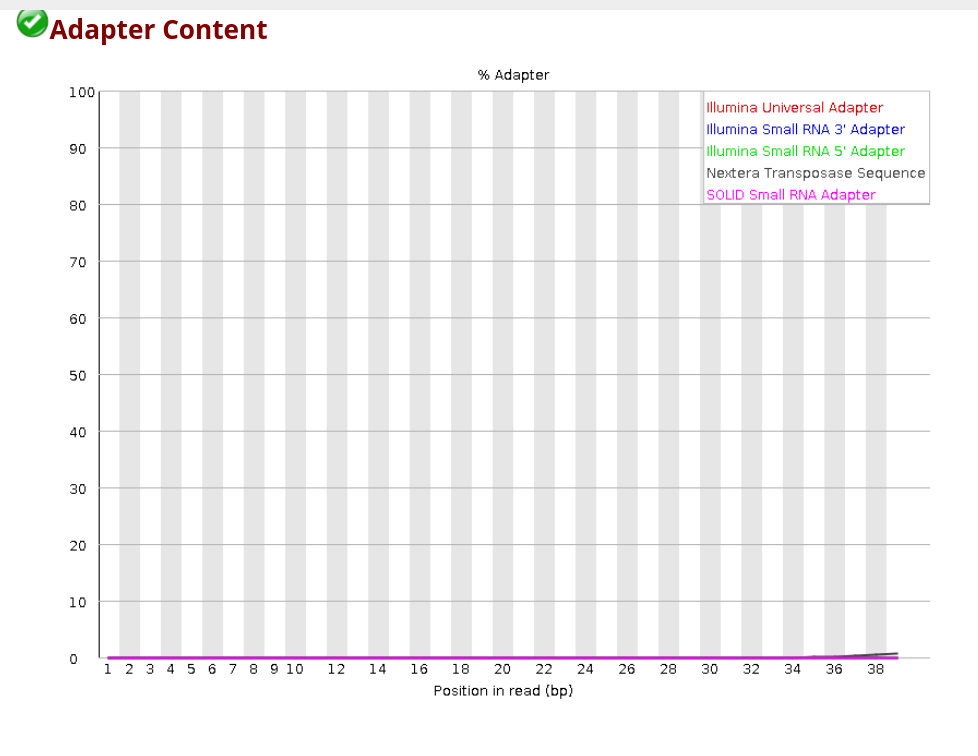

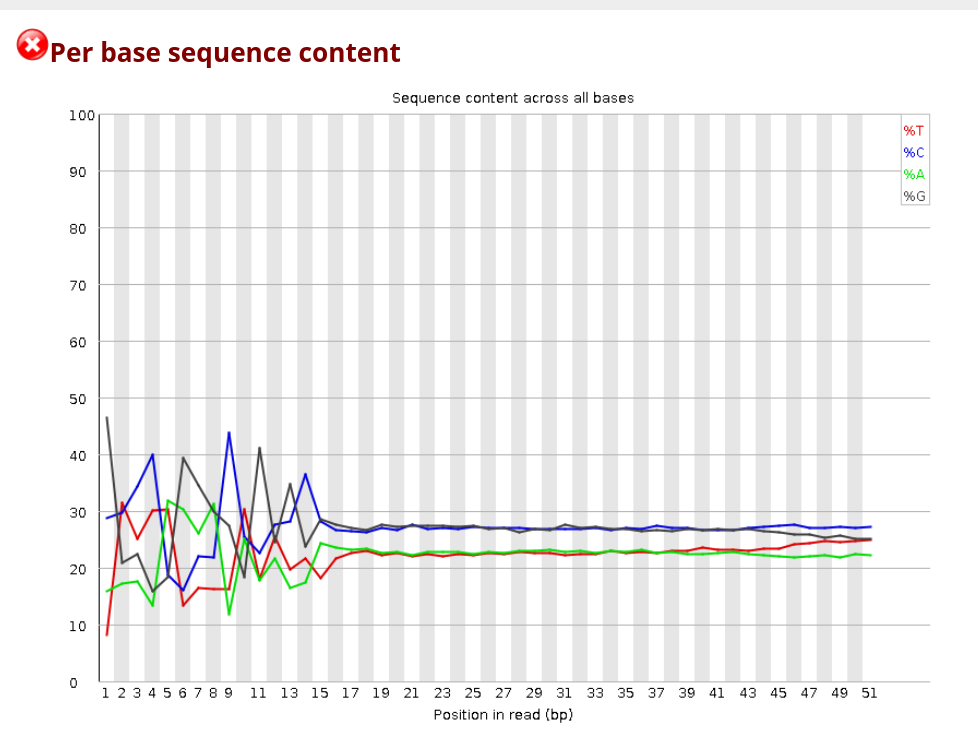

In [2]:
# knockdown 1
fastqc SRR27289034_1.fastq

Started analysis of SRR27289034_1.fastq
Approx 5% complete for SRR27289034_1.fastq
Approx 10% complete for SRR27289034_1.fastq
Approx 15% complete for SRR27289034_1.fastq
Approx 20% complete for SRR27289034_1.fastq
Approx 25% complete for SRR27289034_1.fastq
Approx 30% complete for SRR27289034_1.fastq
Approx 35% complete for SRR27289034_1.fastq
Approx 40% complete for SRR27289034_1.fastq
Approx 45% complete for SRR27289034_1.fastq
Approx 50% complete for SRR27289034_1.fastq
Approx 55% complete for SRR27289034_1.fastq
Approx 60% complete for SRR27289034_1.fastq
Approx 65% complete for SRR27289034_1.fastq
Approx 70% complete for SRR27289034_1.fastq
Approx 75% complete for SRR27289034_1.fastq
Approx 80% complete for SRR27289034_1.fastq
Approx 85% complete for SRR27289034_1.fastq
Approx 90% complete for SRR27289034_1.fastq
Approx 95% complete for SRR27289034_1.fastq
Analysis complete for SRR27289034_1.fastq


In [6]:
# knockdown 2
fastqc SRR27289034_2.fastq

Started analysis of SRR27289034_2.fastq
Approx 5% complete for SRR27289034_2.fastq
Approx 10% complete for SRR27289034_2.fastq
Approx 15% complete for SRR27289034_2.fastq
Approx 20% complete for SRR27289034_2.fastq
Approx 25% complete for SRR27289034_2.fastq
Approx 30% complete for SRR27289034_2.fastq
Approx 35% complete for SRR27289034_2.fastq
Approx 40% complete for SRR27289034_2.fastq
Approx 45% complete for SRR27289034_2.fastq
Approx 50% complete for SRR27289034_2.fastq
Approx 55% complete for SRR27289034_2.fastq
Approx 60% complete for SRR27289034_2.fastq
Approx 65% complete for SRR27289034_2.fastq
Approx 70% complete for SRR27289034_2.fastq
Approx 75% complete for SRR27289034_2.fastq
Approx 80% complete for SRR27289034_2.fastq
Approx 85% complete for SRR27289034_2.fastq
Approx 90% complete for SRR27289034_2.fastq
Approx 95% complete for SRR27289034_2.fastq
Analysis complete for SRR27289034_2.fastq


In [4]:
# WT 1
fastqc SRR27289028_1.fastq

Started analysis of SRR27289028_1.fastq
Approx 5% complete for SRR27289028_1.fastq
Approx 10% complete for SRR27289028_1.fastq
Approx 15% complete for SRR27289028_1.fastq
Approx 20% complete for SRR27289028_1.fastq
Approx 25% complete for SRR27289028_1.fastq
Approx 30% complete for SRR27289028_1.fastq
Approx 35% complete for SRR27289028_1.fastq
Approx 40% complete for SRR27289028_1.fastq
Approx 45% complete for SRR27289028_1.fastq
Approx 50% complete for SRR27289028_1.fastq
Approx 55% complete for SRR27289028_1.fastq
Approx 60% complete for SRR27289028_1.fastq
Approx 65% complete for SRR27289028_1.fastq
Approx 70% complete for SRR27289028_1.fastq
Approx 75% complete for SRR27289028_1.fastq
Approx 80% complete for SRR27289028_1.fastq
Approx 85% complete for SRR27289028_1.fastq
Approx 90% complete for SRR27289028_1.fastq
Approx 95% complete for SRR27289028_1.fastq
Analysis complete for SRR27289028_1.fastq


In [5]:
# WT 2
fastqc SRR27289028_2.fastq

Started analysis of SRR27289028_2.fastq
Approx 5% complete for SRR27289028_2.fastq
Approx 10% complete for SRR27289028_2.fastq
Approx 15% complete for SRR27289028_2.fastq
Approx 20% complete for SRR27289028_2.fastq
Approx 25% complete for SRR27289028_2.fastq
Approx 30% complete for SRR27289028_2.fastq
Approx 35% complete for SRR27289028_2.fastq
Approx 40% complete for SRR27289028_2.fastq
Approx 45% complete for SRR27289028_2.fastq
Approx 50% complete for SRR27289028_2.fastq
Approx 55% complete for SRR27289028_2.fastq
Approx 60% complete for SRR27289028_2.fastq
Approx 65% complete for SRR27289028_2.fastq
Approx 70% complete for SRR27289028_2.fastq
Approx 75% complete for SRR27289028_2.fastq
Approx 80% complete for SRR27289028_2.fastq
Approx 85% complete for SRR27289028_2.fastq
Approx 90% complete for SRR27289028_2.fastq
Approx 95% complete for SRR27289028_2.fastq
Analysis complete for SRR27289028_2.fastq


# Alignment  

In this section, I align the sequencing reads to the **mm10 mouse genome**. The alignment is performed to generate BAM files, which serve as the basis for downstream analyses. Additionally, I include visualizations of the resulting BAM files to assess alignment quality and read coverage.


In [7]:
# knockdown
bowtie2 -p 16 -x /mnt/storage/data/resources/mm10/mm10 -1 SRR27289034_1.fastq -2 SRR27289034_2.fastq -S URE_knockdown.sam

79759455 reads; of these:
  79759455 (100.00%) were paired; of these:
    13996605 (17.55%) aligned concordantly 0 times
    56864015 (71.29%) aligned concordantly exactly 1 time
    8898835 (11.16%) aligned concordantly >1 times
    ----
    13996605 pairs aligned concordantly 0 times; of these:
      7216440 (51.56%) aligned discordantly 1 time
    ----
    6780165 pairs aligned 0 times concordantly or discordantly; of these:
      13560330 mates make up the pairs; of these:
        9557987 (70.48%) aligned 0 times
        1930611 (14.24%) aligned exactly 1 time
        2071732 (15.28%) aligned >1 times
94.01% overall alignment rate


In [8]:
# WT
bowtie2 -p 16 -x /mnt/storage/data/resources/mm10/mm10 -1 SRR27289028_1.fastq -2 SRR27289028_2.fastq -S WT.sam

46683645 reads; of these:
  46683645 (100.00%) were paired; of these:
    8317391 (17.82%) aligned concordantly 0 times
    34612406 (74.14%) aligned concordantly exactly 1 time
    3753848 (8.04%) aligned concordantly >1 times
    ----
    8317391 pairs aligned concordantly 0 times; of these:
      5039133 (60.59%) aligned discordantly 1 time
    ----
    3278258 pairs aligned 0 times concordantly or discordantly; of these:
      6556516 mates make up the pairs; of these:
        4338775 (66.18%) aligned 0 times
        1129602 (17.23%) aligned exactly 1 time
        1088139 (16.60%) aligned >1 times
95.35% overall alignment rate


In [9]:
head -500 URE_knockdown.sam | tail -5

SRR27289034.70	163	chr6	124662679	42	51M	=	124662689	61	TTACATGCCCCAGTAACCCCAGCGCCGGCGACCGAGAGTAACCTCGCGGTC	FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF:FFFFFFFFFFF	AS:i:0	XN:i:0	XM:i:0	XO:i:0	XG:i:0	NM:i:0	MD:Z:51	YS:i:0	YT:Z:CP
SRR27289034.71	83	chr10	20017878	42	51M	=	20017738	-191	AGGGGATGACCCATCAATGCCGAAGTTAGTTCATGGAGTGTGGATCTGGAA	FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF	AS:i:0	XN:i:0	XM:i:0	XO:i:0	XG:i:0	NM:i:0	MD:Z:51	YS:i:0	YT:Z:CP
SRR27289034.71	163	chr10	20017738	42	51M	=	20017878	191	CAGCTGTCAGCGCCATCTTGTGACGGCGAATGTGGGGGCGGCTCCCAACAC	FFFFFFFFFFFFFF:FFFFFFFFFFFFFFFFFFF:FFFFFF:F:FFFFFFF	AS:i:0	XS:i:0	XN:i:0	XM:i:0	XO:i:0	XG:i:0	NM:i:0	MD:Z:51	YS:i:0	YT:Z:CP
SRR27289034.72	99	chr8	70673650	42	51M	=	70673703	104	GATAGGAAAGCTGCGTTTCCGGGAAATGGGCTGGCTTAATGGCTCACGTGG	::FF:FFFFFF:,F:FFF:::F:FFFFF:,:,:FFFFFFFFF:FF:F,F,F	AS:i:-3	XN:i:0	XM:i:1	XO:i:0	XG:i:0	NM:i:1	MD:Z:31G19	YS:i:0	YT:Z:CP
SRR27289034.72	147	chr8	70673703	42	51M	=	70673650	-104	TTCGTTGCCCTCTTGATGCTTATCTGGTGTCTGAC

In [12]:
head -500 WT.sam | tail -5

SRR27289028.230	147	chr12	55329509	42	51M	=	55329461	-99	TCTAATGGTACTTTCCAGATATGTGGTTTATTTTCTTATCTACACTAAGGC	FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF	AS:i:0	XN:i:0	XM:i:0	XO:i:0	XG:i:0	NM:i:0	MD:Z:51	YS:i:0	YT:Z:CP
SRR27289028.231	83	chr1	133418355	42	51M	=	133418179	-227	GGAACCGGTTCTCCGCCCGGCCGGTTCCGCAGGCAGGAGGCGGGGTGCTAG	FFFFFFF:FFF:FFFFFFFFFFFFFFFF:FFFFFFFFFF:FFFFFFFFFFF	AS:i:0	XN:i:0	XM:i:0	XO:i:0	XG:i:0	NM:i:0	MD:Z:51	YS:i:0	YT:Z:CP
SRR27289028.231	163	chr1	133418179	42	51M	=	133418355	227	CCGGGATACTGGGGCTTCCCGCTCTCCCTGCGGTGCCCCGGGCCTATCGGG	FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF	AS:i:0	XN:i:0	XM:i:0	XO:i:0	XG:i:0	NM:i:0	MD:Z:51	YS:i:0	YT:Z:CP
SRR27289028.232	83	chr6	48086614	42	51M	=	48086587	-78	GCTCCACCTGCAGCTCGAGCGGCGAACGGCAGCGCCGGCACCCGCTTGCCG	FFFFFFFFFFFFFF:FFFFFFFFFF:FFFFFFFFFFFFFFFFFFFFFFFF:	AS:i:0	XN:i:0	XM:i:0	XO:i:0	XG:i:0	NM:i:0	MD:Z:51	YS:i:0	YT:Z:CP
SRR27289028.232	163	chr6	48086587	42	51M	=	48086614	78	GCTTCCTGGAGGCAGCGCGGCGGCACAGCTCCACCTGCAGC

### convert sam files to bam

In [13]:
samtools view -@ 8 -S -b URE_knockdown.sam > URE_knockdown.bam

In [14]:
samtools view -@ 8 -S -b WT.sam > WT.bam

number of reads in bam files

In [15]:
# knockdown
samtools view -c URE_knockdown.bam

159518910


In [16]:
# WT
samtools view -c WT.bam

93367290


In [17]:
rm URE_knockdown.sam WT.sam

### sort and index bam files

In [18]:
#knockdown
samtools sort -@ 4 -O bam -o URE_knockdown.sorted.bam URE_knockdown.bam
samtools index -@ 4 URE_knockdown.sorted.bam

[bam_sort_core] merging from 40 files and 4 in-memory blocks...


In [19]:
#WT
samtools sort -@ 4 -O bam -o WT.sorted.bam WT.bam
samtools index -@ 4 WT.sorted.bam

[bam_sort_core] merging from 24 files and 4 in-memory blocks...


### Visualization of bam files 

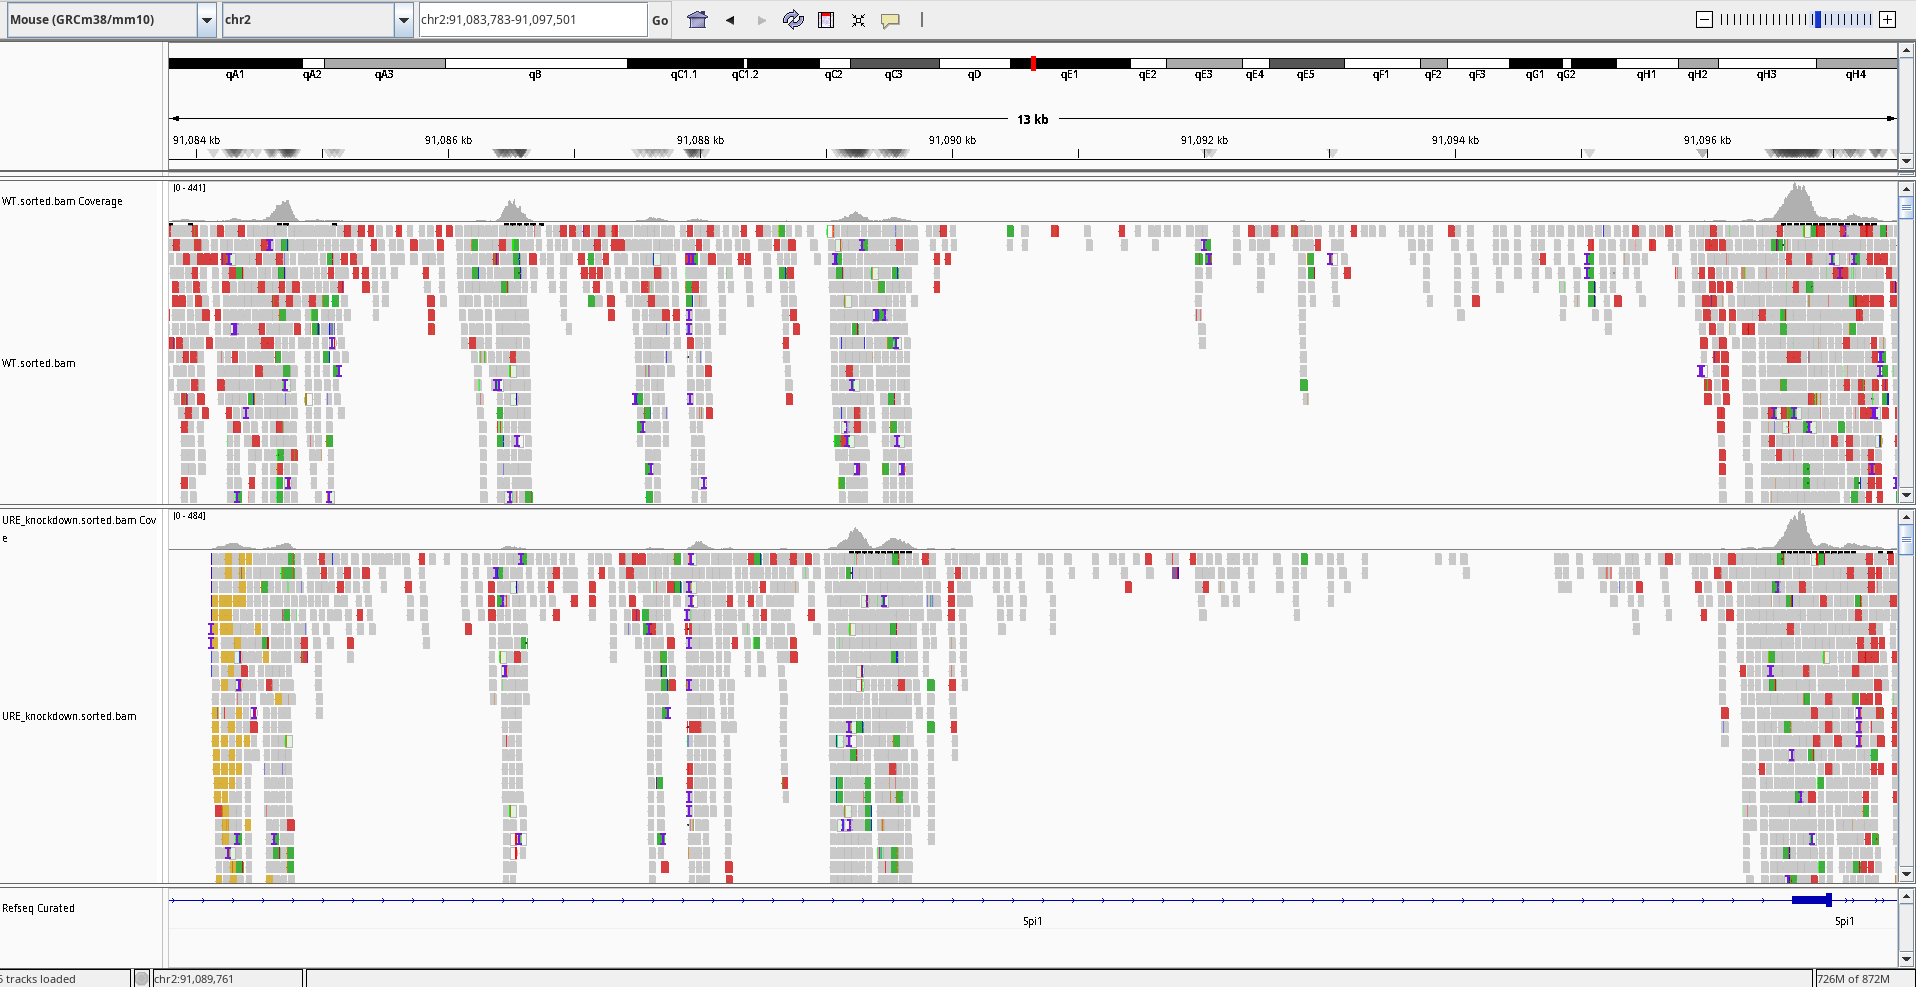

## Genome Coverage  

To calculate genome coverage, I used the effective genome size for the **mm10 mouse genome**. The effective genome size can be referenced from the DeepTools documentation: [Effective Genome Size - DeepTools](https://deeptools.readthedocs.io/en/latest/content/feature/effectiveGenomeSize.html).\
To demonstrate the results of the generated BigWig files, I include a visualization of **Bcl2 gene coverage** in the cell below.

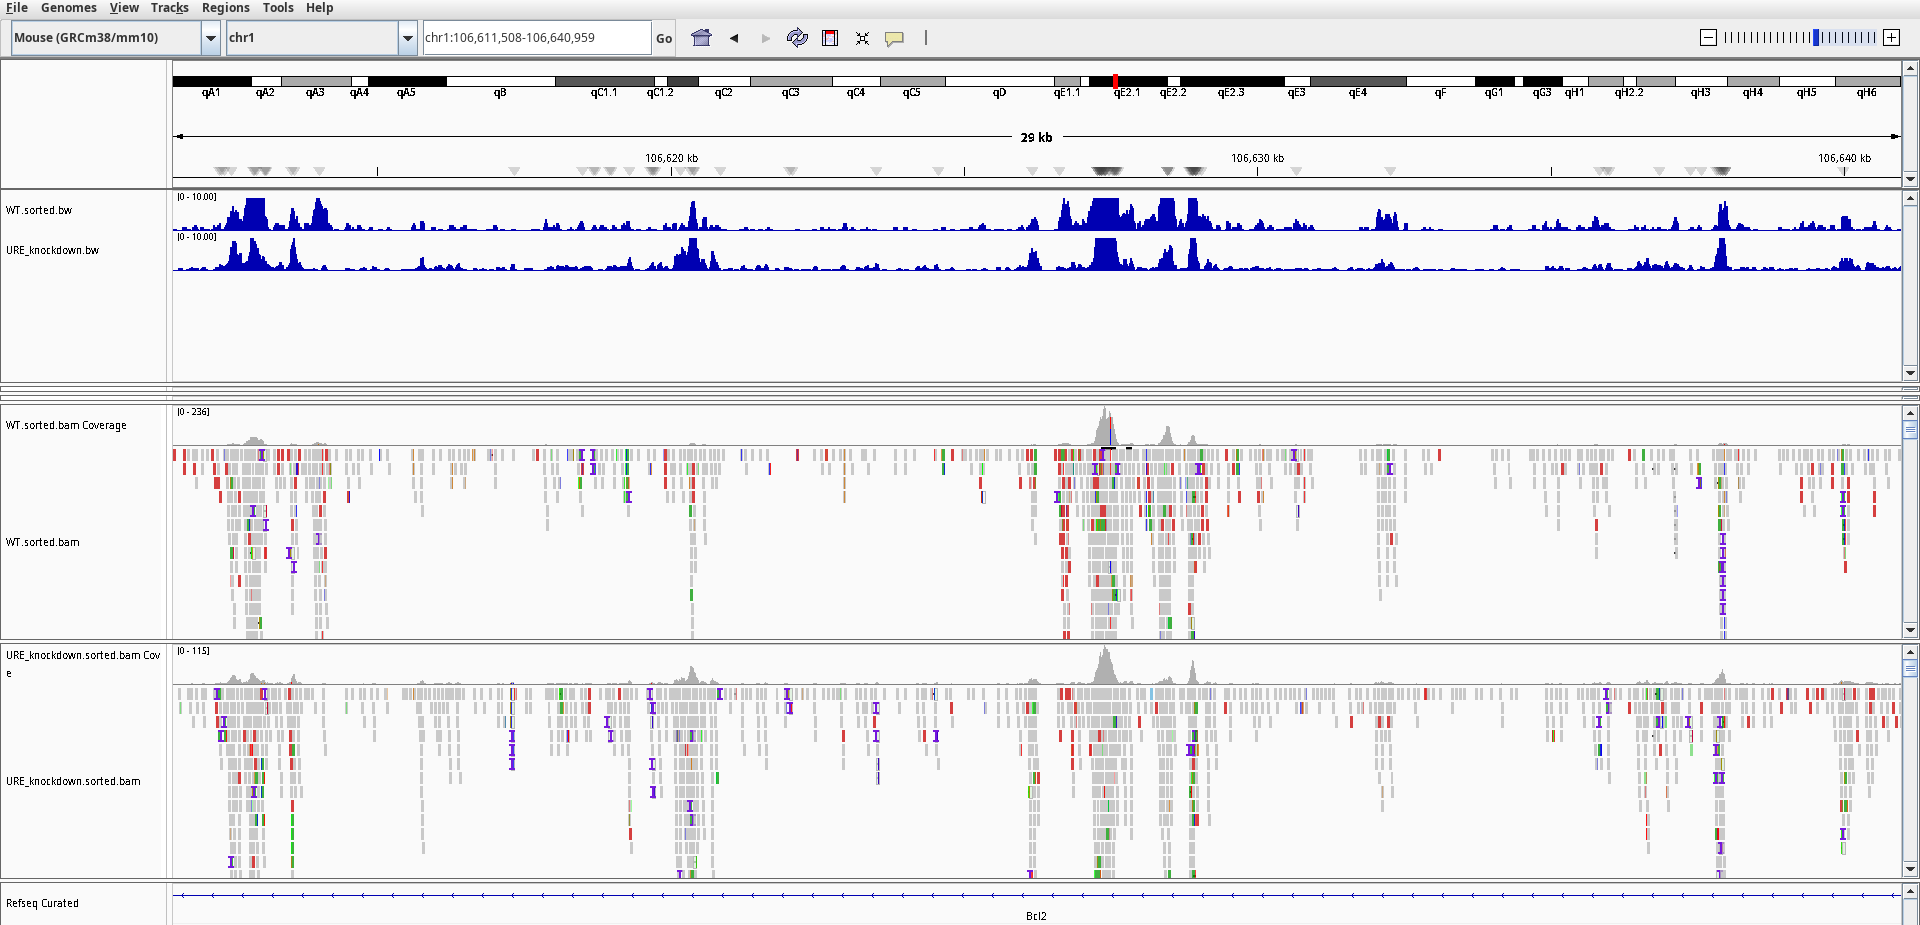

In [1]:
ls

atac_seq_project2.ipynb    SRR27289034_2_fastqc.html
SRR27289028                SRR27289034_2_fastqc.zip
SRR27289028_1_fastqc.html  URE_knockdown.bam
SRR27289028_1_fastqc.zip   URE_knockdown.sorted.bam
SRR27289028_2_fastqc.html  URE_knockdown.sorted.bam.bai
SRR27289028_2_fastqc.zip   WT.bam
SRR27289034                WT.sorted.bam
SRR27289034_1_fastqc.html  WT.sorted.bam.bai
SRR27289034_1_fastqc.zip


In [2]:
# knockdown sample
bamCoverage -p 16 -b URE_knockdown.sorted.bam --normalizeUsing RPGC --effectiveGenomeSize 2652783500 -o URE_knockdown.bw -bs 5

normalization: 1x (effective genome size 2652783500)
bamFilesList: ['URE_knockdown.sorted.bam']
binLength: 5
numberOfSamples: None
blackListFileName: None
skipZeroOverZero: False
bed_and_bin: False
defaultFragmentLength: read length
numberOfProcessors: 16
verbose: False
region: None
bedFile: None
minMappingQuality: None
ignoreDuplicates: False
chrsToSkip: []
stepSize: 5
center_read: False
samFlag_include: None
samFlag_exclude: None
minFragmentLength: 0
maxFragmentLength: 0
zerosToNans: False
smoothLength: None
save_data: False
out_file_for_raw_data: None
maxPairedFragmentLength: 1000


In [3]:
# control sample
bamCoverage -p 16 -b WT.sorted.bam --normalizeUsing RPGC --effectiveGenomeSize 2652783500 -o WT.sorted.bw -bs 5

normalization: 1x (effective genome size 2652783500)
bamFilesList: ['WT.sorted.bam']
binLength: 5
numberOfSamples: None
blackListFileName: None
skipZeroOverZero: False
bed_and_bin: False
defaultFragmentLength: read length
numberOfProcessors: 16
verbose: False
region: None
bedFile: None
minMappingQuality: None
ignoreDuplicates: False
chrsToSkip: []
stepSize: 5
center_read: False
samFlag_include: None
samFlag_exclude: None
minFragmentLength: 0
maxFragmentLength: 0
zerosToNans: False
smoothLength: None
save_data: False
out_file_for_raw_data: None
maxPairedFragmentLength: 1000


# Finding Differential Signal Between Conditions  

In this section, I identify **differentially accessible regions** between **URE_knockdown** and **WT** cells. These regions are necessary for downstream analyses, including:  

- Assigning signature genes to the identified regions  
- Performing motif enrichment analysis to identify potential transcription factor binding sites  
- Annotating the associated genes with **Gene Ontology (GO) terms** to infer what biological pathways are enriched when PU.1 is downregulated

This analysis provides valuable insights into the change in chromatin accessibility when PU.1 is down regulated.  

## Fragment Length Prediction  

Before performing peak calling, it is essential to predict the **fragment length**. This ensures that the `--extsize` argument is set accurately during peak calling, leading to more reliable peak calling results.


In [8]:
macs2 predictd -i URE_knockdown.sorted.bam # predicted fragment length is 77 bps 

INFO  @ Thu, 12 Dec 2024 14:15:08: # read alignment files... 
INFO  @ Thu, 12 Dec 2024 14:15:08: # read treatment tags... 
INFO  @ Thu, 12 Dec 2024 14:15:08: Detected format is: BAM 
INFO  @ Thu, 12 Dec 2024 14:15:08: * Input file is gzipped. 
INFO  @ Thu, 12 Dec 2024 14:15:12:  1000000 
INFO  @ Thu, 12 Dec 2024 14:15:16:  2000000 
INFO  @ Thu, 12 Dec 2024 14:15:20:  3000000 
INFO  @ Thu, 12 Dec 2024 14:15:24:  4000000 
INFO  @ Thu, 12 Dec 2024 14:15:28:  5000000 
INFO  @ Thu, 12 Dec 2024 14:15:32:  6000000 
INFO  @ Thu, 12 Dec 2024 14:15:36:  7000000 
INFO  @ Thu, 12 Dec 2024 14:15:40:  8000000 
INFO  @ Thu, 12 Dec 2024 14:15:44:  9000000 
INFO  @ Thu, 12 Dec 2024 14:15:48:  10000000 
INFO  @ Thu, 12 Dec 2024 14:15:51:  11000000 
INFO  @ Thu, 12 Dec 2024 14:15:55:  12000000 
INFO  @ Thu, 12 Dec 2024 14:15:59:  13000000 
INFO  @ Thu, 12 Dec 2024 14:16:03:  14000000 
INFO  @ Thu, 12 Dec 2024 14:16:07:  15000000 
INFO  @ Thu, 12 Dec 2024 14:16:11:  16000000 
INFO  @ Thu, 12 Dec 2024 14:1

In [9]:
macs2 predictd -i  WT.sorted.bam # predicted fragment length is 82 bps 

INFO  @ Thu, 12 Dec 2024 14:26:12: # read alignment files... 
INFO  @ Thu, 12 Dec 2024 14:26:12: # read treatment tags... 
INFO  @ Thu, 12 Dec 2024 14:26:12: Detected format is: BAM 
INFO  @ Thu, 12 Dec 2024 14:26:12: * Input file is gzipped. 
INFO  @ Thu, 12 Dec 2024 14:26:16:  1000000 
INFO  @ Thu, 12 Dec 2024 14:26:20:  2000000 
INFO  @ Thu, 12 Dec 2024 14:26:24:  3000000 
INFO  @ Thu, 12 Dec 2024 14:26:28:  4000000 
INFO  @ Thu, 12 Dec 2024 14:26:32:  5000000 
INFO  @ Thu, 12 Dec 2024 14:26:36:  6000000 
INFO  @ Thu, 12 Dec 2024 14:26:40:  7000000 
INFO  @ Thu, 12 Dec 2024 14:26:44:  8000000 
INFO  @ Thu, 12 Dec 2024 14:26:48:  9000000 
INFO  @ Thu, 12 Dec 2024 14:26:52:  10000000 
INFO  @ Thu, 12 Dec 2024 14:26:56:  11000000 
INFO  @ Thu, 12 Dec 2024 14:27:00:  12000000 
INFO  @ Thu, 12 Dec 2024 14:27:04:  13000000 
INFO  @ Thu, 12 Dec 2024 14:27:07:  14000000 
INFO  @ Thu, 12 Dec 2024 14:27:11:  15000000 
INFO  @ Thu, 12 Dec 2024 14:27:15:  16000000 
INFO  @ Thu, 12 Dec 2024 14:2

## find peaks in URE knockdown cells and WT cells

In [ ]:
macs2 callpeak -B -t URE_knockdown.sorted.bam -n URE_knockdown --nomodel --extsize 85 -g 2652783500 #1  tags after filtering in treatment: 35010796 

INFO  @ Thu, 12 Dec 2024 15:06:51: 
# Command line: callpeak -B -t URE_knockdown.sorted.bam -n URE_knockdown --nomodel --extsize 85 -g 2652783500
# ARGUMENTS LIST:
# name = URE_knockdown
# format = AUTO
# ChIP-seq file = ['URE_knockdown.sorted.bam']
# control file = None
# effective genome size = 2.65e+09
# band width = 300
# model fold = [5, 50]
# qvalue cutoff = 5.00e-02
# The maximum gap between significant sites is assigned as the read length/tag size.
# The minimum length of peaks is assigned as the predicted fragment length "d".
# Larger dataset will be scaled towards smaller dataset.
# Range for calculating regional lambda is: 10000 bps
# Broad region calling is off
# Paired-End mode is off
 
INFO  @ Thu, 12 Dec 2024 15:06:51: #1 read tag files... 
INFO  @ Thu, 12 Dec 2024 15:06:51: #1 read treatment tags... 
INFO  @ Thu, 12 Dec 2024 15:06:51: Detected format is: BAM 
INFO  @ Thu, 12 Dec 2024 15:06:51: * Input file is gzipped. 
INFO  @ Thu, 12 Dec 2024 15:06:55:  1000000 
INFO  

In [17]:
ls

atac_seq_project2.ipynb           URE_knockdown_peaks.narrowPeak
predictd                          URE_knockdown_peaks.xls
SRR27289028                       URE_knockdown.sorted.bam
SRR27289028_1_fastqc.html         URE_knockdown.sorted.bam.bai
SRR27289028_1_fastqc.zip          URE_knockdown_summits.bed
SRR27289028_2_fastqc.html         URE_knockdown_treat_pileup.bdg
SRR27289028_2_fastqc.zip          WT.bam
SRR27289034                       WT_control_lambda.bdg
SRR27289034_1_fastqc.html         WT_peaks.narrowPeak
SRR27289034_1_fastqc.zip          WT_peaks.xls
SRR27289034_2_fastqc.html         WT.sorted.bam
SRR27289034_2_fastqc.zip          WT.sorted.bam.bai
URE_knockdown.bam                 WT.sorted.bw
URE_knockdown.bw                  WT_summits.bed
URE_knockdown_control_lambda.bdg  WT_treat_pileup.bdg


In [ ]:
macs2 callpeak -B -t WT.sorted.bam -n WT --nomodel --extsize 85 -g 2652783500

In [18]:
egrep "tags after filtering in treatment|tags after filtering in control" URE_knockdown_peaks.xls

# tags after filtering in treatment: 35010796


In [19]:
egrep "tags after filtering in treatment|tags after filtering in control" WT_peaks.xls

# tags after filtering in treatment: 21500282


In [20]:
ls -lt *.bdg

-rw-r--r-- 1 r0993335 domain users  924730031 Dec 12 19:24 WT_control_lambda.bdg
-rw-r--r-- 1 r0993335 domain users 1152443551 Dec 12 19:24 WT_treat_pileup.bdg
-rw-r--r-- 1 r0993335 domain users 1160562271 Dec 12 18:19 URE_knockdown_control_lambda.bdg
-rw-r--r-- 1 r0993335 domain users 1907968365 Dec 12 18:19 URE_knockdown_treat_pileup.bdg


## finding differential signal
In the section below, we use the generated files from the previous section to find the differentially accessible regions 

In [22]:
macs2 bdgdiff \
    --t1 URE_knockdown_treat_pileup.bdg \
    --c1 URE_knockdown_control_lambda.bdg \
    --t2 WT_treat_pileup.bdg \
    --c2 WT_control_lambda.bdg \
    --d1 35010796 \
    --d2 21500282 \
    -g 60 \
    -l 120 \
    -C 3 \
    --o-prefix URE_knockdown_vs_WT

INFO  @ Thu, 12 Dec 2024 20:59:04: Read and build treatment 1 bedGraph... 
INFO  @ Thu, 12 Dec 2024 21:01:02: Read and build control 1 bedGraph... 
INFO  @ Thu, 12 Dec 2024 21:02:20: Read and build treatment 2 bedGraph... 
INFO  @ Thu, 12 Dec 2024 21:03:32: Read and build control 2 bedGraph... 
INFO  @ Thu, 12 Dec 2024 21:13:13: Write peaks... 
INFO  @ Thu, 12 Dec 2024 21:13:14: Done 


In [25]:
ls -lt URE_knockdown_vs_WT*

-rw-r--r-- 1 r0993335 domain users 3924938 Dec 12 21:13 URE_knockdown_vs_WT_c3.0_common.bed
-rw-r--r-- 1 r0993335 domain users 1935779 Dec 12 21:13 URE_knockdown_vs_WT_c3.0_cond2.bed
-rw-r--r-- 1 r0993335 domain users  274244 Dec 12 21:13 URE_knockdown_vs_WT_c3.0_cond1.bed


In [26]:
wc -l *.bed

  154847 URE_knockdown_summits.bed
   60575 URE_knockdown_vs_WT_c3.0_common.bed
    4356 URE_knockdown_vs_WT_c3.0_cond1.bed
   30285 URE_knockdown_vs_WT_c3.0_cond2.bed
  181912 WT_summits.bed
  431975 total


In [28]:
# top regions in knockdown
cat URE_knockdown_vs_WT_c3.0_cond1.bed | sort -k 5,5gr | head

chr7	25902049	25902394	URE_knockdown_vs_WT_cond1_3546	62.75574
chr8	77749427	77749715	URE_knockdown_vs_WT_cond1_3906	58.90848
chr6	138455691	138456018	URE_knockdown_vs_WT_cond1_3479	55.56560
chr14	107080521	107080840	URE_knockdown_vs_WT_cond1_1323	54.30597
chr3	114858615	114858902	URE_knockdown_vs_WT_cond1_2711	54.24730
chr8	77764234	77764525	URE_knockdown_vs_WT_cond1_3908	52.93874
chr8	118629250	118629626	URE_knockdown_vs_WT_cond1_4001	52.67804
chr1	73193984	73194271	URE_knockdown_vs_WT_cond1_100	51.54437
chr1	169158195	169158424	URE_knockdown_vs_WT_cond1_255	50.06284
chr8	26555548	26555770	URE_knockdown_vs_WT_cond1_3823	49.81065
sort: write failed: 'standard output': Broken pipe
sort: write error


## Visualization of some of the  top differentially accessible regions
> chr7	25902049	25902394	

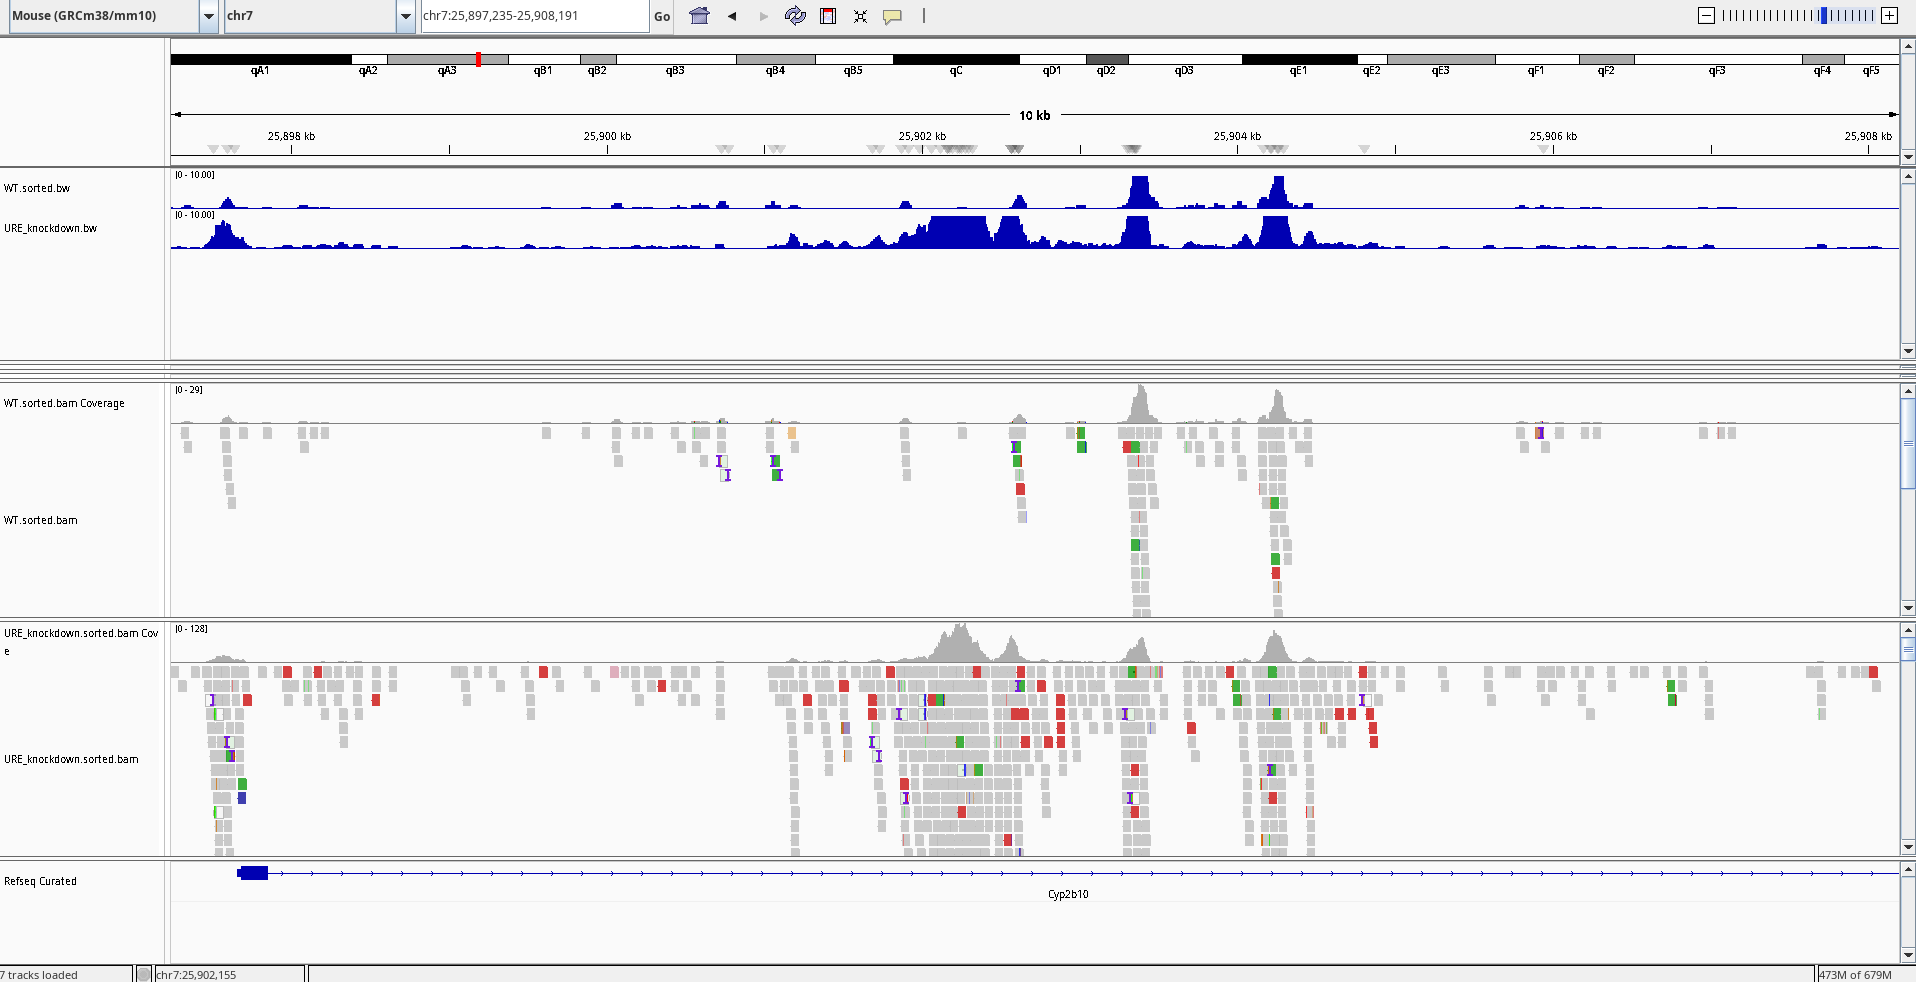

> chr8	77749427	77749715

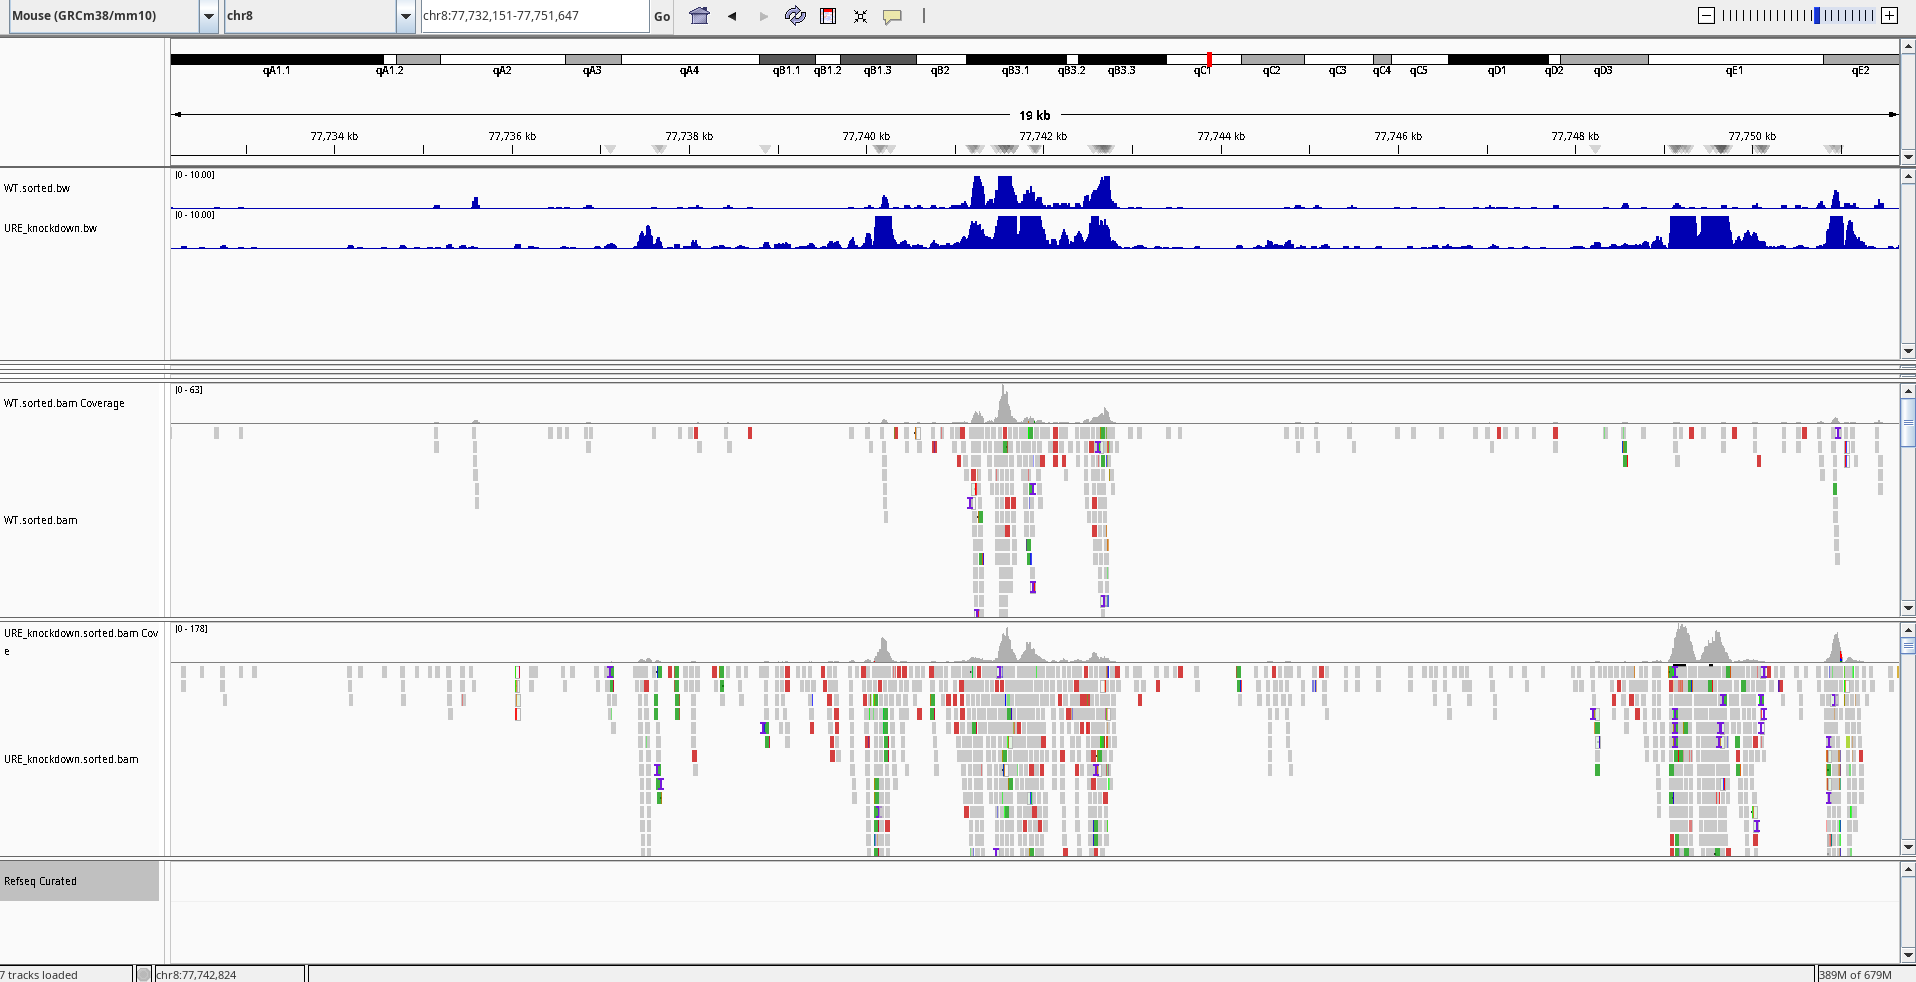

# Motif enrichment analysis
> In this section, we are interested in finding enriched motifs in the differentially accessible regions i found in the previous section. For this, \
i'll do de novo motif discovery using RSAT (https://rsat.france-bioinformatique.fr/teaching/). I'll use the top 5000 regions that are differentially accessible in the URE_knockdown vs WT for this analysis

### Get top 5K regions

In [ ]:
cat URE_knockdown_vs_WT_c3.0_cond1.bed | sort -k 5,5gr | head -n 5000 > URE_knockdown_vs_WT_c3.0_cond1_top5k.bed

### Convert bed to fasta

In [13]:
# convert bed to fasta using bedtools
bedtools getfasta -fi /mnt/storage/data/resources/mm10/mm10.fa -bed URE_knockdown_vs_WT_c3.0_cond1_top5k.bed -fo URE_knockdown_vs_WT_c3.0_cond1_top5k.fasta

In [17]:
head URE_knockdown_vs_WT_c3.0_cond1_top5k.fasta

>chr7:25902049-25902394
GTCCCAGGAACCCCAGGAGAAACCAGCTTGGTTGTCTTAAGTGTGTTGAGGCTGAGCCAACAGCCTGACTCAAGTGCAGCGTCATGAGATCTAGCTCAATTCCAAACTGCTTGTTTTTGCTCATGTGCTTGTGGGCCTGGGTTTTCTGATATGCAATCTGGAATGTTCTCAGGAAGTTTCAGCTGTGACTCAAGAAACCGACAGCTACTCTTCCAGGAGGCTGTGTTGCTGAATGTGATCATGTAGGCTTTTTATCAAGCATACATTACTGAGAATGATTTTGTAAGCATGATGAAATTCTGTTGGTCAGGAGTCGAGAAACAAGCCTAAGCTTTGGCTTCCAGC
>chr8:77749427-77749715
ATGAGGGGACATAACCAATAGTTAAAGATTTAAGTGACCTTAACATATCTTGTTAGTGTCTGTTGATTCAAGTGTGGTTGACAGCAGTCACCAAACCAAAAGTTGAGAAATCCGGTTAAGTAGTTAAACCAAATCAAATCCTATGGTGCAATTGACGTGACAGATGGATGTACATTGACGAAAATTAAGCAGCATCAGCATCGTCCTTAACCACAGTCTGAACACTTGTCCTTATACCCACAGATAAGTGTGGTCCTCACCCCTCACCAAGGAGACAGAGACCATTAC
>chr6:138455691-138456018
GTGTGTATGTGTGTGTGTGTGTGTGTGTGTGTGTGTGTGTCTTAATGTGGCCCTTTCTCCGACCTCCTTCTCAGTCATTGTGGTTTACCCCCAGCTTGTTAAACTGTGGGTCCTGACCCCACCAAGGTTTGTGAAATACTTACCAACAGTGAAAATTTCTGAATGCATGATGATCAAATGAGTAGTTCAAAATCCAGTGTGCACAGAGCCTGAGGATGTCTGGCAGCTTTTGCTAGTTGTGCAATGTGACCCCATTGCATCTGGGTTTTAAACACACAGCAATATTATCAA

## Motif 1
> One of the 13 motifs present in the top 5000 differentially accessible regions is shown below. Most predicted sites are around the center of the peaks with 623 peaks having atleast one predicted site.
    * The CAGGAAG motif identified shares similarities with motifs associated with Signature 1 and 2 genes metioned in the paper, which are directly regulated by PU.1 whose downregulation alters chromatin accessibility and TF binding patterns in URE_GMP cells.
    * This motif also contributes to the regulation of genes in Signature 3, which are overexpressed in URE cells and are enriched for signaling pathways involved in cell survival under PU.1 downregulation.
The other motifs can be found in the file: peak-motifs_all_motifs_seqcoord_URE_knockdown_vs_WT_cond1.tab

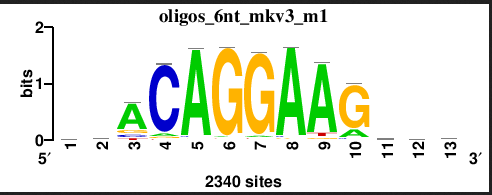

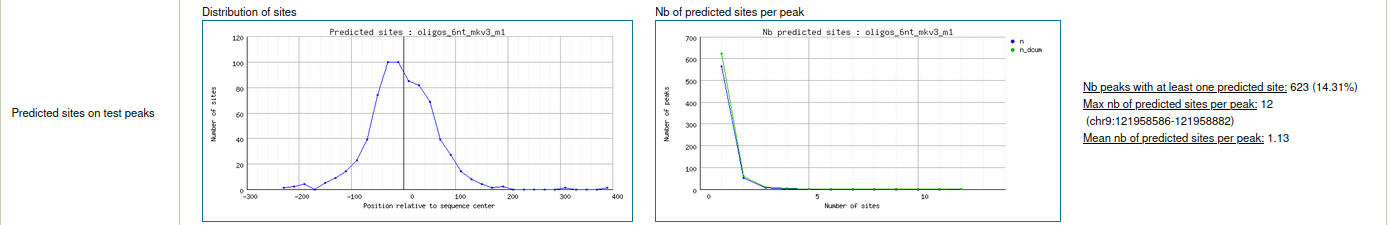

In [20]:
# all motifs file
grep -v ";" peak-motifs_all_motifs_seqcoord_URE_knockdown_vs_WT_cond1.tab | head 

#seq_id	ft_type	ft_name	strand	start	end	sequence	weight
chr8:77764234-77764525	site	oligos_6nt_mkv3_m1	R	-97	-85	ATACAGGAAATGT	8.0
chr2:171125829-171126067	site	oligos_6nt_mkv3_m1	R	24	36	CAACAGGAAGTGG	8.8
chr2:171125829-171126067	site	oligos_6nt_mkv3_m1	R	47	59	ACCCAGGAAGCTA	7.9
chr12:66059799-66060210	site	oligos_6nt_mkv3_m1	R	63	75	AGACAGGAAATAC	8.4
chr15:52334996-52335423	site	oligos_6nt_mkv3_m1	R	-111	-99	CCACAGGAAGATT	8.8
chr15:52334996-52335423	site	oligos_6nt_mkv3_m1	R	69	81	ACACAGGAAGCTG	9.0
chr8:116030993-116031237	site	oligos_6nt_mkv3_m1	D	24	36	GCACAGGATGCGA	8.3
chr17:83453744-83453864	site	oligos_6nt_mkv3_m1	D	19	31	GAACAGGAAGCAC	8.8
chr8:61144741-61144999	site	oligos_6nt_mkv3_m1	R	-69	-57	AGAAAGGAAGCGG	8.1
grep: write error: Broken pipe


# Link Peaks to Genes
> We'll use  GREAT (http://great.stanford.edu/public/html/) to link our peaks to genes that become accessible when PUT1 is knocked down\
I used the following parameters: -> (GREAT version 4.0.4	Species assembly: mm10	Association rule: Basal+extension: 5000 bp upstream, 1000 bp downstream, 50000 bp max extension, curated regulatory domains included)\
We can then use these genes to do functional enrichment analysis


In [30]:
awk '{print $1, $2, $3}' URE_knockdown_vs_WT_c3.0_cond1_top5k.bed > URE_knockdown_vs_WT_clean.bed

In [41]:
awk '{print $1, $2, $3}' URE_knockdown_vs_WT_c3.0_common.bed > URE_knockdown_vs_WT_common_clean.bed

In [32]:
# genes from GREAT -> 20241224-public-4.0.4-vurQEj-mm10-all-gene.txt
cat 20241224-public-4.0.4-vurQEj-mm10-all-gene.txt | cut -f 1 | grep -v '#' | wc -l

2273


In [36]:
cat 20241224-public-4.0.4-vurQEj-mm10-all-gene.txt | cut -f 1 | grep -v '#' > gene_list.txt

The study indicates that PU.1-downregulated cells transition to an autophagy-predominated stem cell gene program. BCL2's involvement in preventing apoptosis could be critical in this context, as it may help sustain cell viability while other pathways are being activated. Here i look for _Bcl2_ in the list of genes assigned to the differentially accessible REs as a positive control 

In [43]:
cat 20241224-public-4.0.4-vurQEj-mm10-all-gene.txt | cut -f 1 | grep -v '#' | grep -x Bcl2

Bcl2


# Fucntional analysis of the genes
> GREAT does functional analysis as well, it determines GO term enrichment in the genes assigned to our putative REs\
I will also look at gprofiler(https://biit.cs.ut.ee/gprofiler/), to do some functional enrichment analysis
Below is a bar graph showing the enriched GO biological processes in URE knockdown mice vs WT mice obtained from GREAT. A screenshot from gProfiler can also be seen at the bottom.\
<u>**Interpretation:** </u>
* The paper discusses how the transcription factor PU.1 is essential for myeloid fate and how its downregulation leads to significant changes in gene expression and chromatin accessibility. This suggests that genes associated with protein binding, catalytic activity and metabolism may be influenced by PU.1's regulatory role, as these functions are critical in various cellular processes, including signaling and metabolism\
* The paper also notes that URE Δ cells shift their survival control towards an autophagy-predominated stem cell gene program. This shift may involve genes that are linked to protein binding and other GO terms found, as autophagy and stem cell maintenance are often associated with protein interactions and enzymatic activities


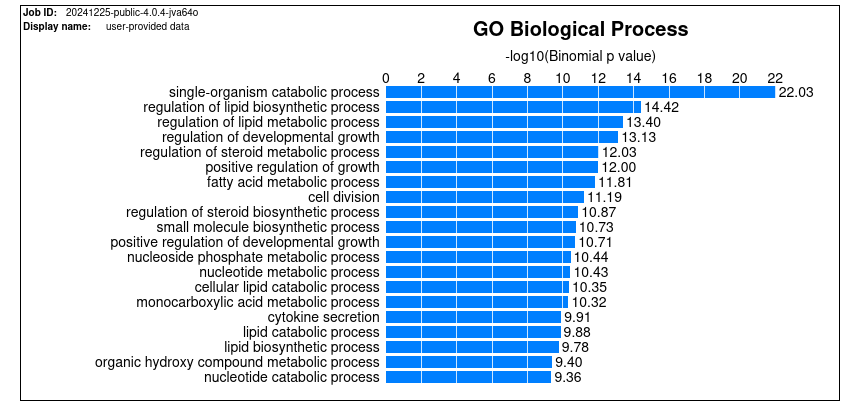

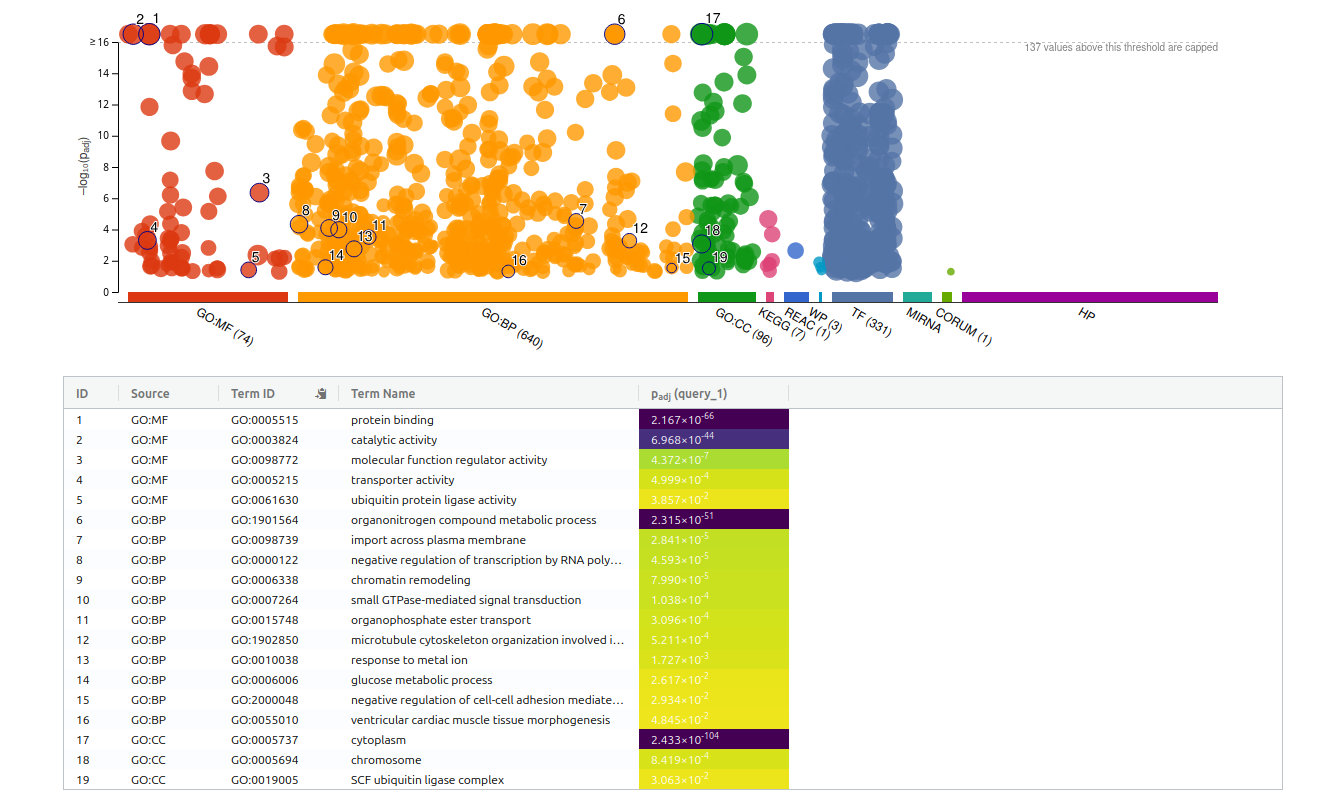

> The graph below also shows the phenotypes that are linked to the genes assigned to the REs. Notably we notice abnormal artery morphology. PU.1 downregulation leads to a shift in gene expression patterns, which could affect cellular behaviors related to vascular integrity and morphology

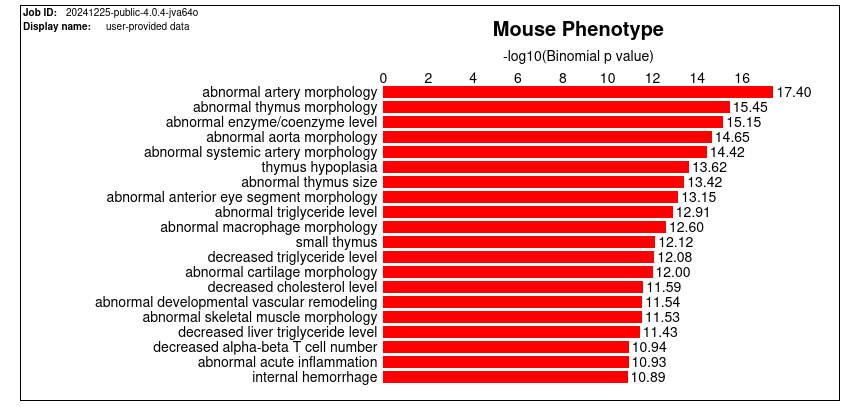